In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as statsmodels
from scipy import stats

dataset = pd.read_csv("mariokart.csv")


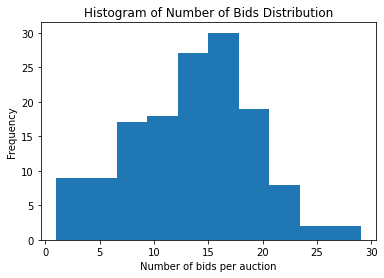

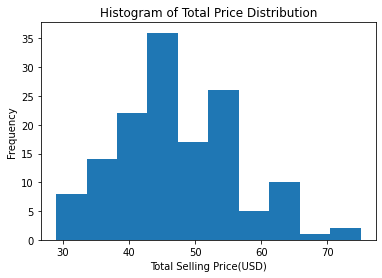

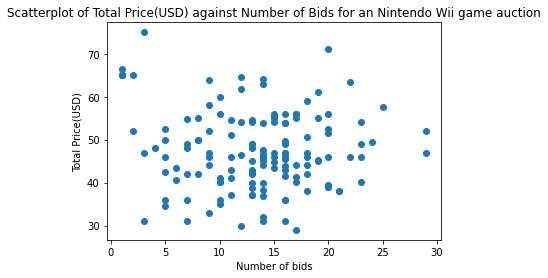

In [35]:

# Remove the two outliers in total price
dataset = dataset[dataset['total_pr'] < 100]
df_x = dataset['n_bids']
df_y = dataset['total_pr']

plt.hist(df_x)
plt.title("Histogram of Number of Bids Distribution")
plt.xlabel("Number of bids per auction")
plt.ylabel("Frequency")
plt.show()

plt.hist(df_y)
plt.title("Histogram of Total Price Distribution")
plt.xlabel("Total Selling Price(USD)")
plt.ylabel("Frequency")
plt.show()


plt.scatter(df_x, df_y)
plt.title("Scatterplot of Total Price(USD) against Number of Bids for an Nintendo Wii game auction")
plt.xlabel("Number of bids")
plt.ylabel("Total Price(USD)")

plt.show()


In [36]:
# descriptivestats

def descriptive_stats(datalist, variable_name=""):
    mean = sum(datalist)/len(datalist)
    sd = np.std(datalist)
    _range = max(datalist)-min(datalist)

    print(f"""The Descriptive statisitcs for the column {variable_name} Are:\n
    \t Count: {len(datalist)}
    \t Mean: {mean}
    \t Mode: {stats.mode(datalist)}
    \t Median: {np.median(datalist)}
    \t Range: {_range}
    \t Standard Deviation: {sd}
    """
          )


descriptive_stats(df_x, "Number of Bids")
descriptive_stats(df_y, " Total Price( in USD)")


The Descriptive statisitcs for the column Number of Bids is:

    	 Count: 141
    	 Mean: 13.382978723404255
    	 Mode: ModeResult(mode=array([16], dtype=int64), count=array([15]))
    	 Median: 14.0
    	 Range: 28
    	 Standard Deviation: 5.743524969082079
    
The Descriptive statisitcs for the column  Total Price( in USD) is:

    	 Count: 141
    	 Mean: 47.43191489361702
    	 Mode: ModeResult(mode=array([46.]), count=array([8]))
    	 Median: 46.03
    	 Range: 46.019999999999996
    	 Standard Deviation: 9.081276030788121
    


In [37]:
# correlation
r, p = stats.pearsonr(df_x, df_y)


def pearsons_r(x, y):
    # calculate pearson's r using the formula
    if len(x) != len(y):
        raise Exception("Improper dataset")
    n = len(x)
    sd_x = np.std(x)
    sd_y = np.std(y)
    mean_x = sum(x)/n
    mean_y = sum(y)/n

    _sum = 0
    for a, b in zip(x, y):
        numerator = (a-mean_x)*(b-mean_y)
        denominator = (sd_x*sd_y)
        _sum += numerator/denominator

    return _sum/n


print("Pearson's r=", pearsons_r(df_x, df_y))
print(r)


Pearson's r= -0.07873206017839551
-0.07873206017839551


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               total_pr   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8670
Date:                Tue, 01 Feb 2022   Prob (F-statistic):              0.353
Time:                        19:29:31   Log-Likelihood:                -510.71
No. Observations:                 141   AIC:                             1025.
Df Residuals:                     139   BIC:                             1031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.0979      1.947     25.217      0.000      45.248      52.948
n_bids        -0.1245      0.134     -0.931      0.353      -0.389       0.140
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.612
Skew:                           0.326   Prob(JB):                        0.271
Kurtosis:                       2.859   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

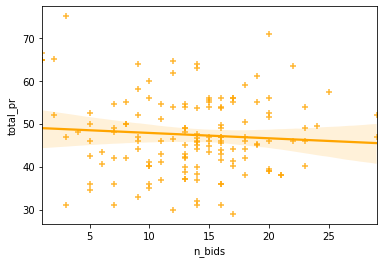

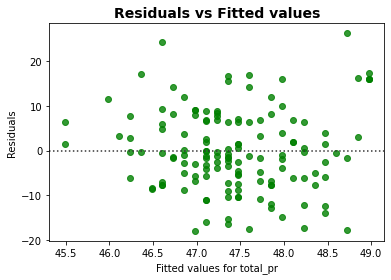

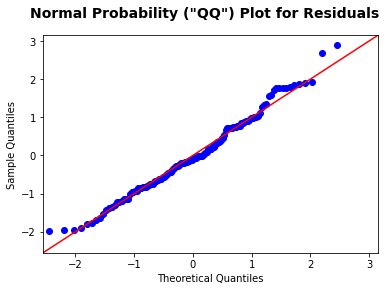

In [38]:
# simple linear regression
def multi_regression(column_x, column_y, data):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.

    Retrieved from : https://sle-collaboration.minervaproject.com/?url=https%3A//sle-authoring.minervaproject.com/api/v1/worksheets/aa2e8df4-77e4-4f65-97e4-8feb4316cda7/&userId=11848&name=Kyron+Nyoro&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Lewis_Nyoro_11848_2021-08-17T06%3A59%3A18.237Z&noPresence=1&readOnly=1&isInstructor=0&signature=af3757169a9e383e43f4a89eeec4119cf01fa142aa7ce4973cb56412a3209326
    '''

    if len(column_x) == 1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data,
                    marker="+", fit_reg=True, color='orange')

    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]

    global regressionmodel
    regressionmodel = statsmodels.OLS(Y, X).fit()

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(
        x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',
                           fontweight='bold', fontsize=14)

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid, fit=True, line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",
                    fontweight='bold', fontsize=14)


multi_regression(["n_bids", ], 'total_pr', dataset)
regressionmodel.summary()


In [39]:

def significance_test(alpha, SE=None, sy=None, sx=None, r=None, b1=None, n=None):
    if b1 is None:
        # fill in an expression, in terms of the quantities above, to copmpute the point-estimate
        # for the slope
        b1 = r*sy/sx
    print("b1 =", b1)

    if SE is None:
        SE = (sy/sx) * ((1 - r**2)/(n-2))**0.5
    print("SE =", SE)

    t = (b1 - 0)/SE
    print("t =", t)

    p = (1-stats.t.cdf(t, n-2))*2
    print("p =", p)


params = dict(regressionmodel.params)
significance_test(.05, b1=params['n_bids'],
                  sy=np.std(df_y), sx=np.std(df_x), r=r, n=len(df_y))


b1 = -0.12448584707152377
SE = 0.133693636097995
t = -0.9311276939186388
p = 1.6465980960548086


In [46]:
# forward selection
def forward_selector_regression(dataset, response):
    # Find the multiple linear regeession model using the forward selection method
    # 1. Calculate the r^2 of a simple linear model of each variable
    # 2. Pick the variable with the highest r^2 value
    # 3. Repeat steps 4-7, :
    #   4. Create new models by each adding one of the remaining variables to the preceding model
    #   5. Calculate the r^2 of the new models and compare the r^2 value to that of the previous
    #       model
    #   6. Proceed with the model amongst the generated ones with the highest r^2.
    #       7. If none of the new models have a higher  r^2 value than the , stop and return the previous model.

    # Modified from: https://sle-collaboration.minervaproject.com/?url=https%3A//sle-authoring.minervaproject.com/api/v1/worksheets/aa2e8df4-77e4-4f65-97e4-8feb4316cda7/&userId=11848&name=Kyron+Nyoro&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Lewis_Nyoro_11848_2021-08-17T06%3A59%3A18.237Z&noPresence=1&readOnly=1&isInstructor=0&signature=af3757169a9e383e43f4a89eeec4119cf01fa142aa7ce4973cb56412a3209326

    final_columns = []
    optimum = False
    current_r_2 = 0
    predictor_columns = list(dataset.columns)
    predictor_columns.remove(response)
    while optimum is False:
        largest_column = None
        largest_column_r_2 = None
        for column in predictor_columns:
            skip = False
            column_x = final_columns+[column]
            X = dataset[column_x]
            X = statsmodels.add_constant(X)
            Y = dataset[response]
            # construct model:
            global regressionmodel
            try:
                regressionmodel = statsmodels.OLS(Y, X).fit()
            except:
                # The column is not quantitative, therefore cannot be used in our  linear model
                skip = True
            if skip is False:
                if largest_column_r_2 is None or regressionmodel.rsquared > largest_column_r_2:
                    largest_column = column
                    largest_column_r_2 = regressionmodel.rsquared_adj
        if largest_column_r_2 > current_r_2:
            current_r_2 = largest_column_r_2
            final_columns.append(largest_column)
            predictor_columns.remove(largest_column)
        else:
            optimum = True
    print("The final coumns used are ", final_columns)
    X = dataset[final_columns]
    X = statsmodels.add_constant(X)
    Y = dataset[response]
    regressionmodel = statsmodels.OLS(Y, X).fit()


forward_selector_regression(dataset, "total_pr")
regressionmodel.summary()


The final coumns used are  ['wheels', 'seller_rate', 'start_pr', 'n_bids', 'duration']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               total_pr   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     76.82
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           9.06e-38
Time:                        19:36:39   Log-Likelihood:                -416.20
No. Observations:                 141   AIC:                             844.4
Df Residuals:                     135   BIC:                             862.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.0583      1.780     19.695      0.000      31.538      38.579
wheels          7.9884      0.539     14.830      0.000       6.923       9.054
seller_rate  2.349e-05   8.61e-06      2.728      0.007    6.46e-06    4.05e-05
start_pr        0.1688      0.038      4.468      0.000       0.094       0.244
n_bids          0.2359      0.091      2.579      0.011       0.055       0.417
duration       -0.4887      0.174     -2.801      0.006      -0.834      -0.144
==============================================================================
Omnibus:                        7.899   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.795
Skew:                           0.479   Prob(JB):                       0.0203
Kurtosis:                       3.641   Cond. No.                     2.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""